## Multiple linear regression

### Housing case study
##### Problem statement
- Consider a real state company that has a data set containing the prices of properties in the delhi region.Real_estate company wants to use the dataset to optimise(to make something as good as possible)(to increase house price) the house prices of properties based on important factors such as area,bedrooms,parking ,ac etc

##### Essentially company wants:
- to identfy the variables affecting house prices e.g. bcz of area price is getting affected or bcz of main road etc.
- To create a linear model that quantitatively relates house prices with variables such as no. of bedroom,area,etc
- comapny wants to know the accuracy of the model i.e, how well this variables can predict the target variable(dependent variable) i.e, house prices.

- So interpretation is important (an expalnation of something)
- Interpretation means : A +ve coefficient(+ve correlation) indicates that as independent variable increases, dependent variable will also increase ,
- -ve coefficient indicates independent varaible increases then dependent variable decreases 

- Interpretation is used to analyse (gives an explanation) a relation between independent variable and dependent variable using a straight line(linear regression line).


- This is a machine learning project that uses linear regression to predict the prices of houses. The project is built using Python and Jupyter Notebook.

- The dataset used for this project contains information about houses in a particular area, including the number of bedrooms, the square footage, and the sale price.

- The project consists of the following steps:

- Data Preprocessing: The dataset is cleaned, and any missing or incorrect values are removed or corrected.
- Data Exploration: Exploratory data analysis is performed to gain insights into the dataset and identify any patterns or trends.
- Feature Engineering: The features used in the model are selected and engineered to improve the accuracy of the model.
- Model Building: A linear regression model is trained on the dataset using scikit-learn.
- Model Evaluation: The model's performance is evaluated using metrics such as mean squared error and R-squared.
- Predictions: Finally, the model is used to make predictions on new data.
----
- The goal of this project is to build a machine learning model that accurately predicts the prices of houses. By doing so, this project can be useful for real estate professionals or homeowners looking to buy or sell a house.

## Steps
- Reading,understanding and visualising the data
- Preparing the data for modelling (train-test split ,rescaling etc)
- Training the model
- Residual analysis
- Predictions and evaluation on the test data


### Reading and understanding the data 
- lets import libraries first

In [1]:
# import pandas library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the data
housing = pd.read_csv("/Users/sakshimunde/Downloads/Housing.csv")
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
# Price is our target variable.Shape is 545 rows and 13 columns
# Lets see null values and data types

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# No null values and data types are also correct
# Now lets describe the data

housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Understanding the data
##### Visualisng numerical data 

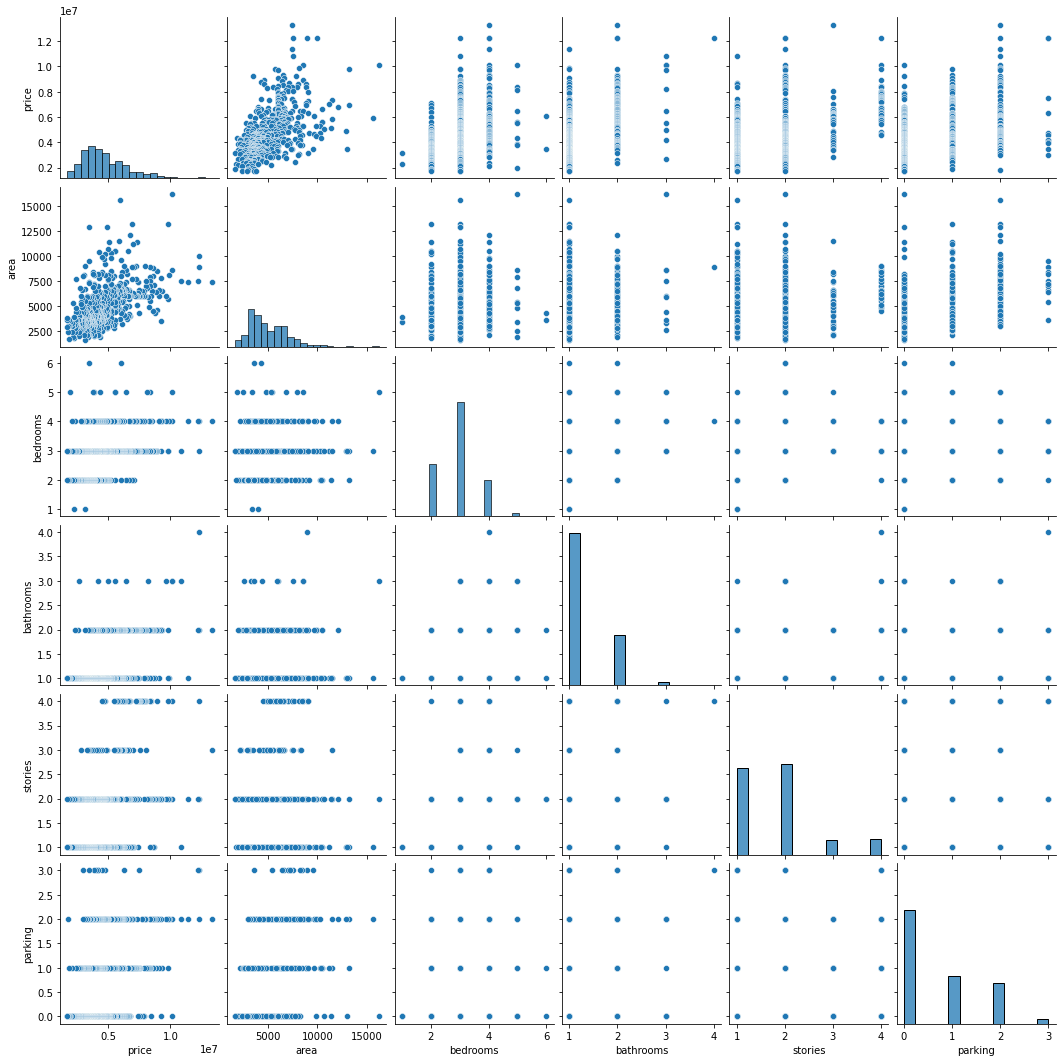

In [6]:
# Lets visualise the above data as it is not clear just by seeing values
# plot a pairplot and see the relation between this variables 

sns.pairplot(housing)
plt.show()

- If there is multicollinearity going on this is the first step to catch it.
- There is a relation between area and price

#### Visualising categorical vairables

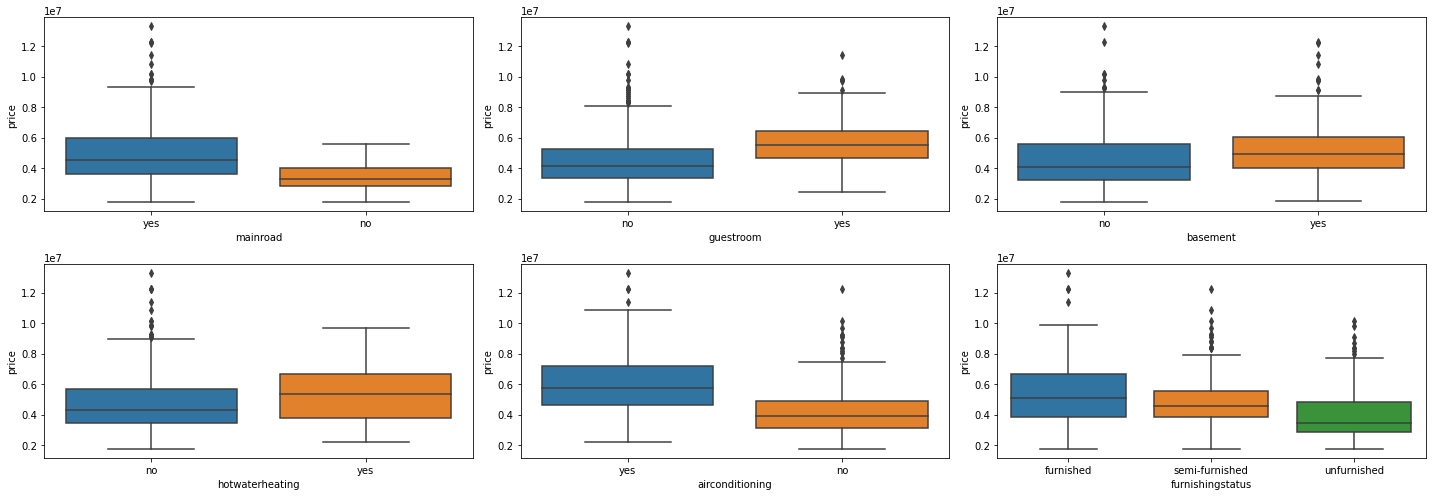

In [7]:
# Visualising Categorical data using boxplots

plt.figure(figsize=[20,7])

plt.subplot(2,3,1)
sns.boxplot(x= 'mainroad' ,y='price',data=housing)

plt.subplot(2,3,2)
sns.boxplot(x= 'guestroom' ,y='price',data=housing)

plt.subplot(2,3,3)
sns.boxplot(x= 'basement' ,y='price',data=housing)

plt.subplot(2,3,4)
sns.boxplot(x= 'hotwaterheating' ,y='price',data=housing)

plt.subplot(2,3,5)
sns.boxplot(x= 'airconditioning' ,y='price',data=housing)

plt.subplot(2,3,6)
sns.boxplot(x= 'furnishingstatus' ,y='price',data=housing)

plt.tight_layout()      
plt.show()

- PRICE AND MAINROAD : House near mainroad (yes) has high price and house not near mainroad has low price.
-----
- Guestroom : House including guestroom also has more price but not much difference with no guestroom in house price 
- ---
- Basement : House with basement and no basement has no much difference in price.
- --
- Ariconditioning : Houses with airconditiong has high price and there is much difference in price with and without airconditioned 
- ----
- furinshing Status : Furnished houses are having more price than unfurnished and semi furnished.But there is not much difference in price in furnished and semifurnished houses


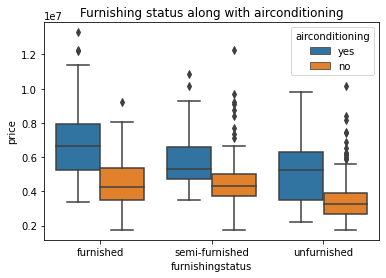

In [601]:
# lets see furnishing status house along with airconditioning

sns.boxplot(x='furnishingstatus' , y='price' ,data =housing ,hue = 'airconditioning')
plt.title("Furnishing status along with airconditioning")
plt.show()

- Furnished : House that is furnished and airconditioned are of high price.House with no ac and furnished have maximum price of 0.8 which is 3rd quartile of ac house price.

### Data interpretation
#### Preparing data for modelling
-----
## Steps:
##### 1. Encoding
    - Converting binary(True/False ,Yes/No) variables to 1's and 0's. 
##### 2.Splitting data into train and test datasets
##### 3.Rescaling of variables

In [17]:
# let's see unique values of all columns
print({"mainroad" :housing['mainroad'].unique()},"\n")
print({"guestroom":housing['guestroom'].unique()},"\n")
print({"basement":housing['basement'].unique()},'\n')
print({"hotwatering":housing['hotwaterheating'].unique()},"\n")
print({"airconditioning":housing['airconditioning'].unique()},'\n')
print({"prefarea":housing['prefarea'].unique()},'\n')
print({"furnishingstatus":housing['furnishingstatus'].unique()})

{'mainroad': array(['yes', 'no'], dtype=object)} 

{'guestroom': array(['no', 'yes'], dtype=object)} 

{'basement': array(['no', 'yes'], dtype=object)} 

{'hotwatering': array(['no', 'yes'], dtype=object)} 

{'airconditioning': array(['yes', 'no'], dtype=object)} 

{'prefarea': array(['yes', 'no'], dtype=object)} 

{'furnishingstatus': array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)}


In [18]:
# Lets create a variable lists of binary vars

varslist = ['mainroad','guestroom','basement','hotwaterheating','prefarea','airconditioning']
housing[varslist]

,mainroad,guestroom,basement,hotwaterheating,prefarea,airconditioning
0,yes,no,no,no,yes,yes
1,yes,no,no,no,no,yes
2,yes,no,yes,no,yes,no
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,no,yes
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [19]:
# Convert binary variables to 1' & 0's
housing[varslist] =housing[varslist].apply(lambda x: x.map({'yes':1,'no':0}))


In [20]:
housing[varslist]

,mainroad,guestroom,basement,hotwaterheating,prefarea,airconditioning
0,1,0,0,0,1,1
1,1,0,0,0,0,1
2,1,0,1,0,1,0
3,1,0,1,0,1,1
4,1,1,1,0,0,1
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [21]:
# Let's see how the overall dataframe looks like
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Great all the yeses and no's converted to 1's and 0's

- we have successfully handled the categorical variables with two levels.However one column i.e, furnishing status has 3 levels.So for this we need to use dummy encoding.

#### Dummy variables 

In [22]:
# lets create dummy variable for furnishing status

status = pd.get_dummies(housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


- lets drop furnished column.
- Thus furnishing can be identified with last 2 columns as well_
   - Furnished values : 00
   - Semi furnished   : 10
   - unfurnished      : 01

In [23]:
# Let's drop furnished column 

status = pd.get_dummies(housing['furnishingstatus'],drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [24]:
# now lets concatinating status dataframe with housing dataframe

housing = pd.concat([housing,status],axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [25]:
# Drop furnishingstatus column

housing = housing.drop('furnishingstatus',axis=1)


In [26]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [27]:
housing.shape
# columns got increase from 13 to 14 bcz of dummy variables and we dropped 1 column

(545, 14)

### Splitting data into train and test sets

In [28]:
# import train test split
import sklearn
from sklearn.model_selection import train_test_split

In [29]:
# splitting data into train and test datasets
df_train,df_test = train_test_split(housing, train_size = 0.7 ,test_size =0.3 ,random_state=100)


In [30]:
df_train.head()
# this is train data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [31]:
# Now let's look at the dimensions of train data
df_train.shape

(381, 14)

In [33]:
# dimension of test data set
df_test.shape

(164, 14)

### Rescaling Features

##### So for rescaling we use STANDARDISATION OR Normalisation
- Min-max scaling(also known as Normalisation) : compresses data between 0 and 1(max will be 1 and min will be 0)
- STANDARDISATION : converts ur data so that it will center ur data to mean of 0 and standard deviation to be 1
-----
Formulae :-
- Normalisation : (x-xmin)/(xmin-xmax)
- standardisation : (x - mean)/standard deviation

In [34]:
# scikit comes with useful module called preprocessing which has builtin function min-max scaler

from sklearn.preprocessing import MinMaxScaler

In [35]:
# let's create an object of our class 
scaler = MinMaxScaler()

# numerical variables 
num_vars = ['price','area','bedrooms','bathrooms','stories','parking']

# fit and transform numerical values
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [622]:
# let's describe the train data set and see minimum and maximum value

df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- all values are ranging between 0 and 1.

### 3.Training the model

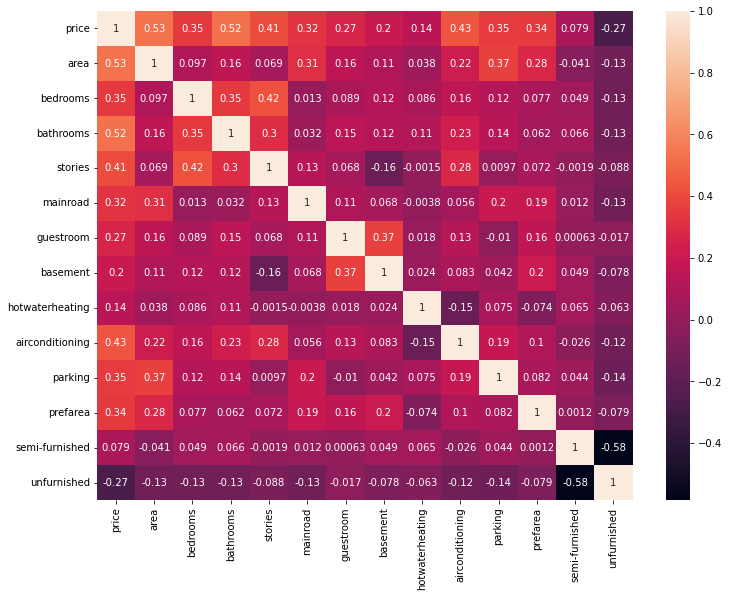

In [623]:
# Let's use 2nd method,adding independent variables one by one
# but before that lets see the correlation between the independent variables using heat map
plt.figure(figsize=(12,9))
sns.heatmap(df_train.corr(),annot = True )
plt.show()

### Dividing into X and y sets for model building

In [37]:
# price is a dependent/target variable

y_train = df_train.pop('price')

In [38]:
# X train
X_train = df_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


### Building a linear model

In [39]:
# import stats library

import statsmodels.api as sm


In [40]:
# let's look at all columns
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [41]:
# add constant bcz by default stats take intercept from origin
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,1.0,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [42]:
# Now create a linear model and fit the model
lr_1 = sm.OLS(y_train,X_train_sm).fit()
lr_1

In [43]:
# let's look at parameters 
lr_1.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [44]:
# summary
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           8.83e-83
Time:                        21:07:51   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####  based on p values we will drop variables.
- pvalue of semi furnished is 0.938 ,which is 90%. p value should be less than 5% for being significant.
- looking at p value semi furnished doesn't look significant in the precense of other varaibles.
- We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

- We look at p value and VIF value and decide whether to drop a variable or not.

### VIF
- Higher VIF value indicate that variable is strongly related with other variables.So for significant model we want lower VIF value.
- Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.

In [45]:
# let's import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


In [47]:
# drop semi-furnished as it is insignificant
X = X_train.drop('semi-furnished',axis=1)

# add constant
X_train_sm = sm.add_constant(X)

# create linear model and fit the model
X_train_sm = sm.OLS(y_train,X_train_sm).fit()

# see summary
X_train_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.07e-83
Time:                        21:11:16   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 is 68% means model is good

In [48]:
# let's see VIF value for our new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [49]:
# bedrooms VIF is >5 SO LET'S DROP 
X = X.drop('bedrooms',axis=1)
X.head()

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.155227,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,0.403379,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,0.115628,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,0.454417,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,0.538015,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [50]:
# lets add constant 
X_train_sm = sm.add_constant(X)

# create a model and fit it
lr_2 = sm.OLS(y_train,X_train_sm).fit()
lr_2.params

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64

In [51]:
# let's look at summary
lr_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           2.73e-84
Time:                        21:12:10   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


- it is always advisable that you drop variables one by one. Now, this variable definitely has a high VIF and needs to be dropped,bcz it might happen that after you drop higher vif value variable,other variables vif value will drop. So never drop more than one variable at a time.
-----
###### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Residual analysis
- residual analysis(error) = y - ypred

In [53]:
# lets Predict
y_train_pred = lr_2.predict(X_train_sm)
y_train_pred.head()

359    0.109599
19     0.463835
159    0.330450
35     0.515631
28     0.468225
dtype: float64

In [54]:
# residual
resd = y_train - y_train_pred
resd.head()

359    0.060098
19     0.151316
159   -0.009238
35     0.032502
28     0.107532
dtype: float64

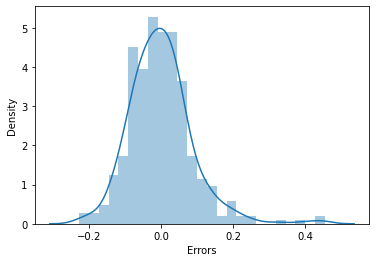

In [55]:
# Now that we got residual lets  check for assumptions
# 1. In our assumption we say that the mean is centered at 0 ,we see this by plotting dist plot
# 2. And there should be no pattern

sns.distplot(resd)
plt.xlabel("Errors")
plt.show()

- mean is 0.0, so assumption came out true.It is a normal distribution.Means our model is correct.
-----
- we got R^2 = 67%, for area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea	,unfurnished.
- Means 67% of variance in price is due to this 11 independent variables.
## Making Predictions and evaluation on test dataset
######  final step is doing predictions on test date set
- 
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions.

In [56]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


- One more point to be noted is that whatever preprocessing you do on the training set has to be replicated onto the testing set before you start making predictions.
 

In [57]:
# numerical columns
num_vars = ['price','area','bedrooms','bathrooms','stories','parking']

# scaling on test data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].head()

,price,area,bedrooms,bathrooms,stories,parking
265,0.229697,0.091869,0.4,0.0,0.333333,0.000000
54,0.484848,0.366420,0.4,0.5,0.333333,0.333333
171,0.303030,0.742080,0.4,0.0,0.000000,0.333333
244,0.242424,0.306582,0.4,0.0,0.333333,0.000000
268,0.227879,0.274023,0.6,0.0,0.333333,0.000000


In [58]:
# now all vars are on same scale,so lets describe
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing data into xtest and y test

In [59]:
y_test = df_test.pop("price")
X_test = df_test

In [60]:
y_test.head()

265    0.229697
54     0.484848
171    0.303030
244    0.242424
268    0.227879
Name: price, dtype: float64

In [61]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [62]:
# add constant to x data set
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [63]:
# we dropped columns in train data set,now we should drop them in test as well
X_test_sm = X_test_sm.drop(['bathrooms','semi-furnished'],axis=1) 

In [64]:
X_test_sm.head()

,const,area,bedrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,0.091869,0.4,0.333333,1,0,0,0,0,0.000000,1,0
54,1.0,0.366420,0.4,0.333333,1,1,0,0,1,0.333333,0,0
171,1.0,0.742080,0.4,0.000000,1,0,0,0,0,0.333333,1,0
244,1.0,0.306582,0.4,0.333333,1,1,1,0,0,0.000000,1,0
268,1.0,0.274023,0.6,0.333333,1,0,0,0,1,0.000000,0,0


In [65]:
# now lets predict 
y_test_pred = lr_2.predict(X_test_sm)
y_test_pred.head()

265    0.283571
54     0.405965
171    0.417913
244    0.387989
268    0.372517
dtype: float64

In [66]:
# residual
resdiual = y_test-y_test_pred


<AxesSubplot:ylabel='Density'>

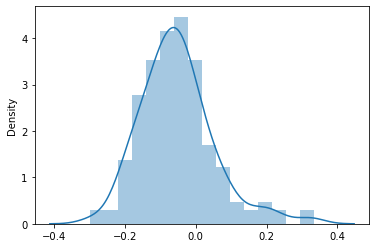

In [67]:
# see the distplot to understand the spread
sns.distplot(resdiual)

In [68]:
# R^2 value for test data set
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_pred)
r2

0.5341718153898667


We can see that the equation of our best fitted line is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $




- area is strongly correlated with price and if area increases by 1unit ,then price increases by 0.236 units and so on for bathrooms,stories etc.
- unfurnished has (-ve) value indicates if house is unfurnished then price decreases by 0.0337.